In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight') # special style template for matplotlib, highly useful for visualizing time series data
from pylab import rcParams
rcParams['figure.figsize'] = 10, 7
from datetime import datetime

In [2]:
df = pd.read_csv('Electric_Production.csv')

In [3]:
#Rename Columns
df.columns=['Date', 'Consumption']
# Drop Null Values
# df=df.dropna()

df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True) #set date as index
df.head()

,Consumption
Date,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


In [4]:
mean=df['Consumption'].mean()
var=df['Consumption'].var()
std=df['Consumption'].std()

In [5]:
print("global mean:",mean)
print("global std:",std)

global mean: 88.84721763224182
global std: 15.387833664730909


In [6]:
# Number of chunks
num_chunks = 6

# Split into chunks (handles uneven splits)
chunks = np.array_split(df['Consumption'], num_chunks)

# Calculate means and standard deviations for each chunk
means = [chunk.mean() for chunk in chunks]
stds = [chunk.std() for chunk in chunks]

# Display the results
for i, (mean, std) in enumerate(zip(means, stds), 1):
    print(f"Chunk {i}: Mean = {mean:.2f}, Std = {std:.2f}")
    

Chunk 1: Mean = 67.20, Std = 6.94
Chunk 2: Mean = 77.78, Std = 7.24
Chunk 3: Mean = 87.66, Std = 7.73
Chunk 4: Mean = 96.65, Std = 8.46
Chunk 5: Mean = 101.21, Std = 9.40
Chunk 6: Mean = 102.91, Std = 9.75


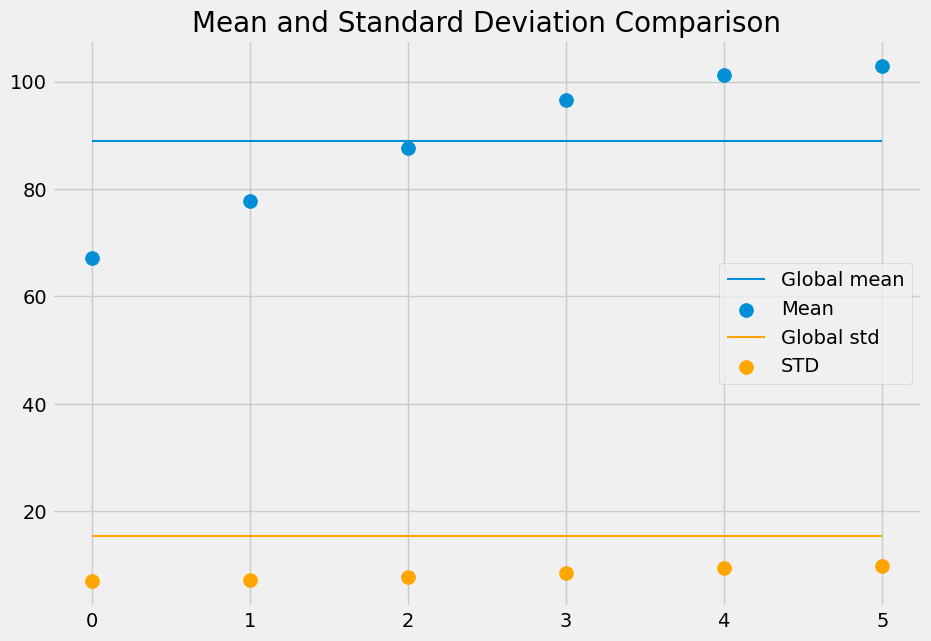

In [7]:
# Plot
plt.title('Mean and Standard Deviation Comparison', size=20)
plt.plot(np.arange(len(means)), [df.mean()] * len(means), label='Global mean', lw=1.5)
plt.scatter(x=np.arange(len(means)), y=means, label='Mean', s=100)
plt.plot(np.arange(len(stds)), [df.std()] * len(stds), label='Global std', lw=1.5, color='orange')
plt.scatter(x=np.arange(len(stds)), y=stds, label='STD', color='orange', s=100)
plt.legend();

In [8]:
df['lag1']=df['Consumption'].shift(1)
df['lag2'] = df['Consumption'].shift(2)
df['lag3'] = df['Consumption'].shift(3)
df['lag4'] = df['Consumption'].shift(4)
df['lag5'] = df['Consumption'].shift(5)

In [9]:
df.head()

,Consumption,lag1,lag2,lag3,lag4,lag5
Date,,,,,,
1985-01-01,72.5052,NaN,NaN,NaN,NaN,NaN
1985-02-01,70.6720,72.5052,NaN,NaN,NaN,NaN
1985-03-01,62.4502,70.6720,72.5052,NaN,NaN,NaN
1985-04-01,57.4714,62.4502,70.6720,72.5052,NaN,NaN
1985-05-01,55.3151,57.4714,62.4502,70.6720,72.5052,NaN


In [10]:
lags=5
from statsmodels.tsa.stattools import acf
autocorrelations=acf(df['Consumption'],nlags=lags)
print(autocorrelations,"\n")

[1.         0.86277906 0.63640377 0.52487459 0.61398953 0.8028675 ] 



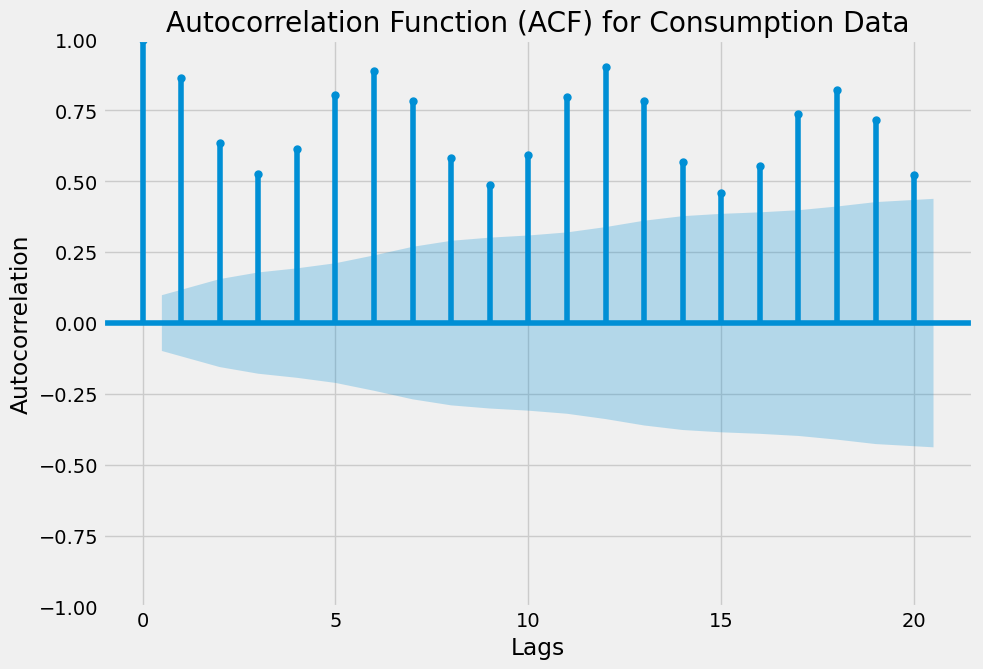

In [11]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df['Consumption'],lags=20)
plt.title('Autocorrelation Function (ACF) for Consumption Data')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.show()

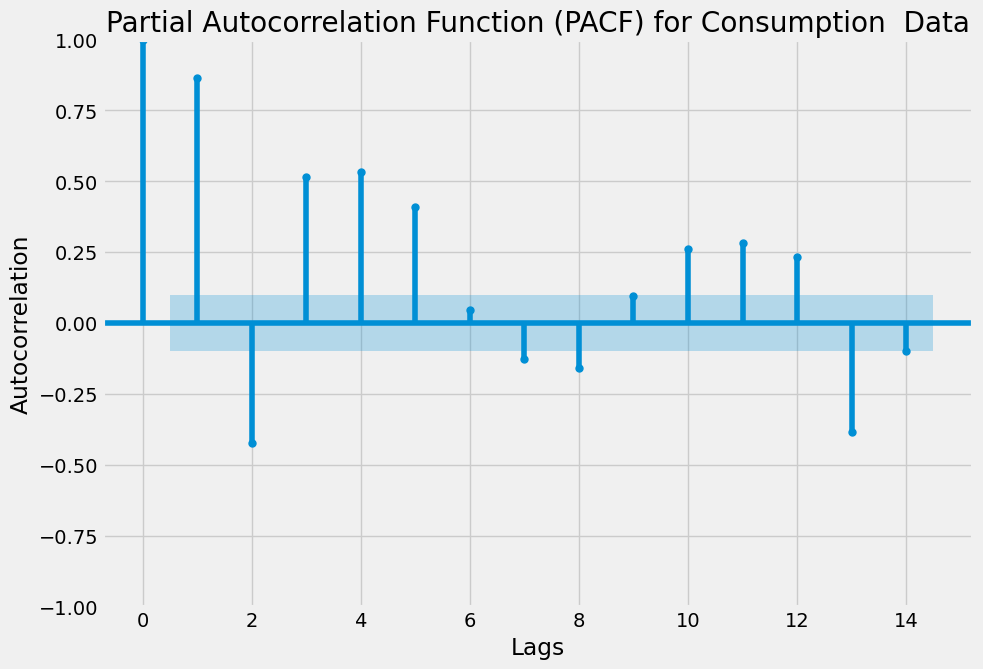

In [12]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df['Consumption'],lags=14)
plt.title('Partial Autocorrelation Function (PACF) for Consumption  Data')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.show()

In [13]:
from statsmodels.tsa.stattools import adfuller

ADF_result=adfuller(df['Consumption'])
ADF_result

(-2.25699035004723,
 0.18621469116587275,
 15,
 381,
 {'1%': -3.4476305904172904,
  '5%': -2.869155980820355,
  '10%': -2.570827146203181},
 1840.8474501627156)

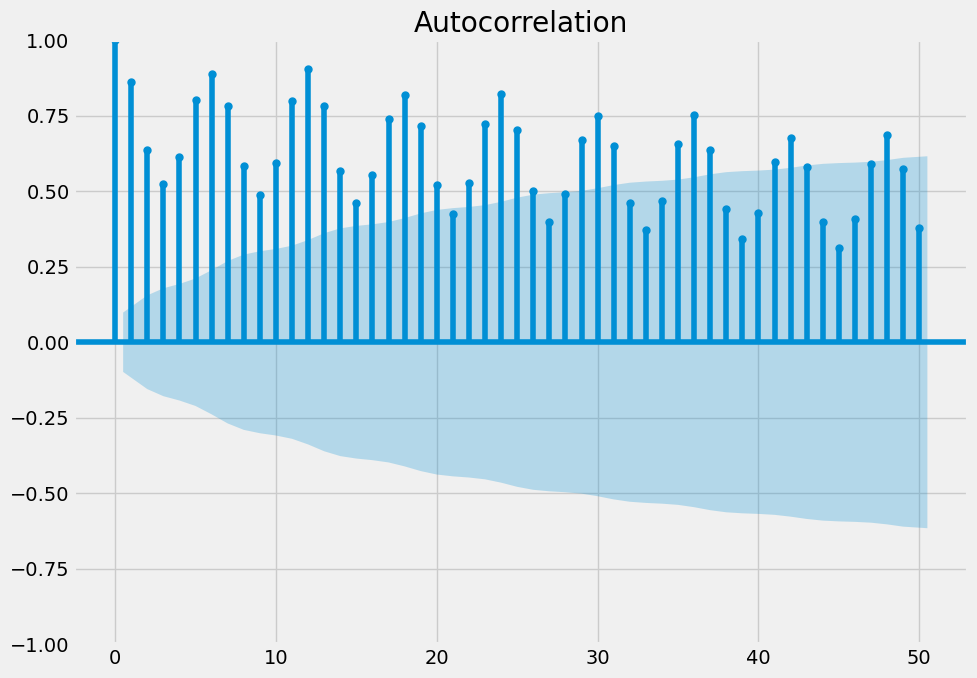

In [14]:
plot_acf(df['Consumption'], lags=50);

plt.tight_layout()

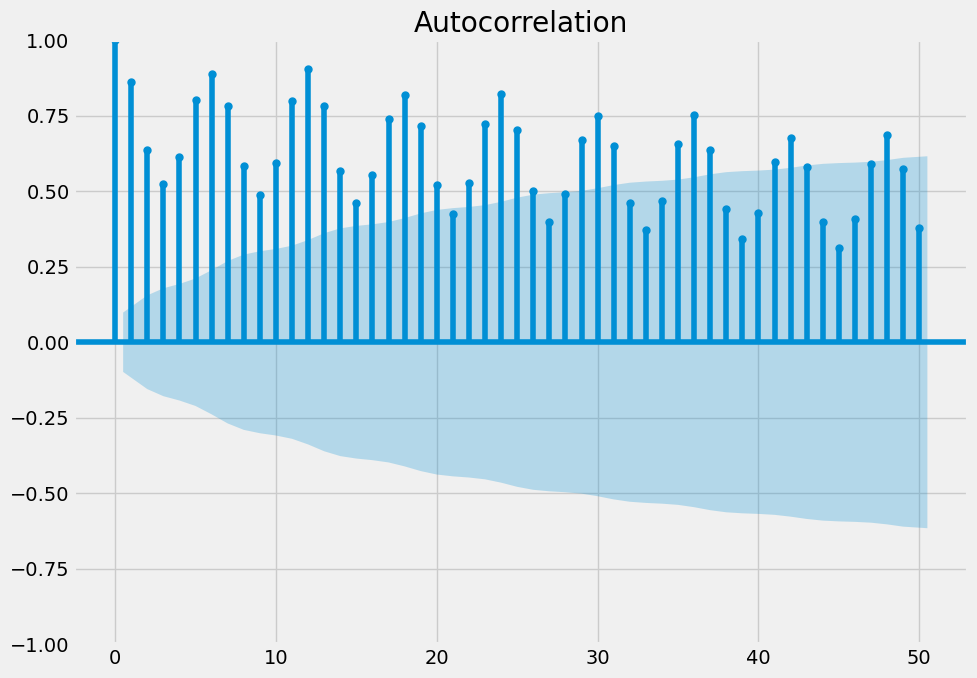

In [15]:
plot_acf(df['Consumption'], lags=50);

plt.tight_layout()

In [16]:
pd.infer_freq(df.index)

'MS'

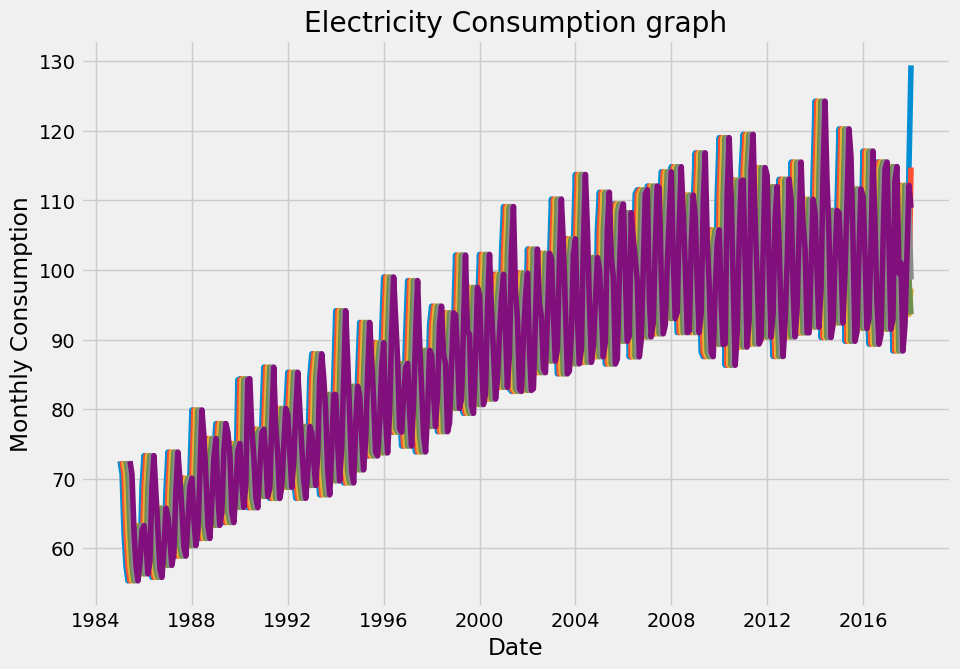

In [17]:
plt.xlabel("Date")
plt.ylabel("Monthly Consumption")
plt.title("Electricity Consumption graph")
plt.plot(df)

In [18]:
# Extract Monthly Data

df['year'] = df.index.year
# df_sub = df[(df['year'] >= 2016) & (df['year'] <= 2018)]['Consumption']
df_2016 = df[df['year'] ==2016]['Consumption']
df_2017 = df[df['year'] ==2017]['Consumption']

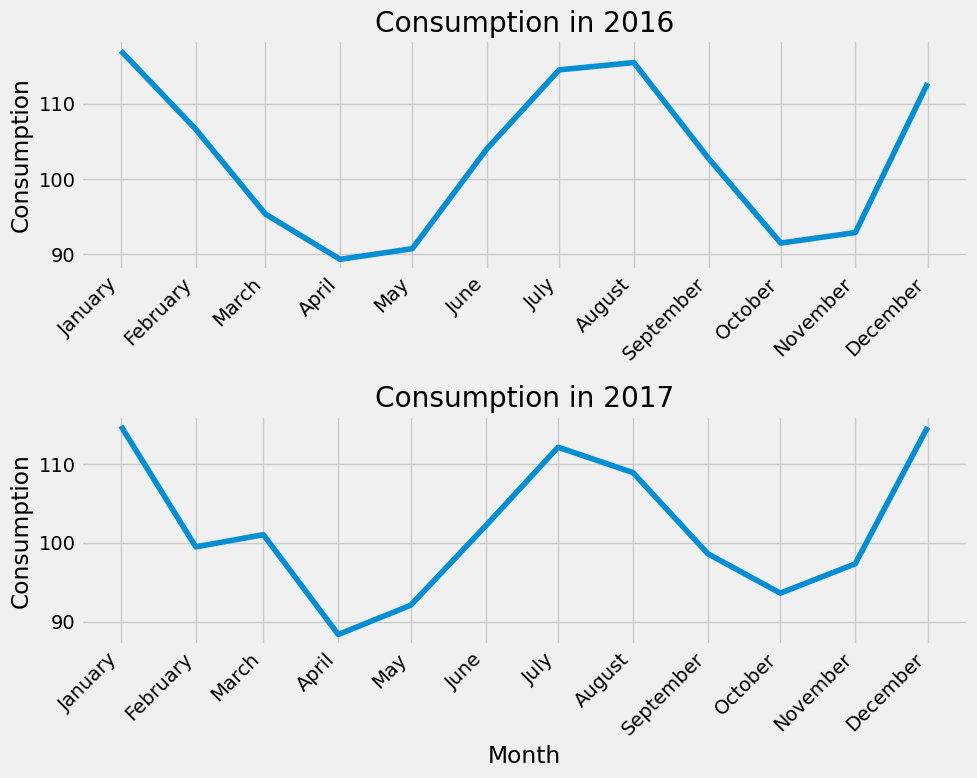

In [19]:
import matplotlib.dates as mdates

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))


# Plot 2016 data
ax1.plot(df_2016.index, df_2016)
ax1.set_title('Consumption in 2016')
ax1.set_ylabel('Consumption')
# ax1.legend()

# Plot 2017 data
ax2.plot(df_2017.index, df_2017)
ax2.set_title('Consumption in 2017')
ax2.set_ylabel('Consumption')
# ax2.legend()

# Set major ticks to the first day of each month and format to show month names
for ax in [ax1, ax2]:
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%B'))  # Display month names

# Rotate month labels for both plots for better readability
plt.setp(ax2.get_xticklabels(), rotation=45, ha='right')
plt.setp(ax1.get_xticklabels(), rotation=45, ha='right')

# Display the plot
plt.xlabel('Month')
plt.tight_layout()
plt.show()

In [20]:
# Extract more time features
df['hour'] = df.index.hour
df['dayofweek'] = df.index.dayofweek
df['month'] = df.index.month
df['quarter'] = df.index.quarter
df['year'] = df.index.year
df['dayofyear'] = df.index.dayofyear

In [21]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    return 'Unknown'

# Apply the function to the 'Month' column to create the 'Season' column
df['Season'] = df['month'].apply(get_season)

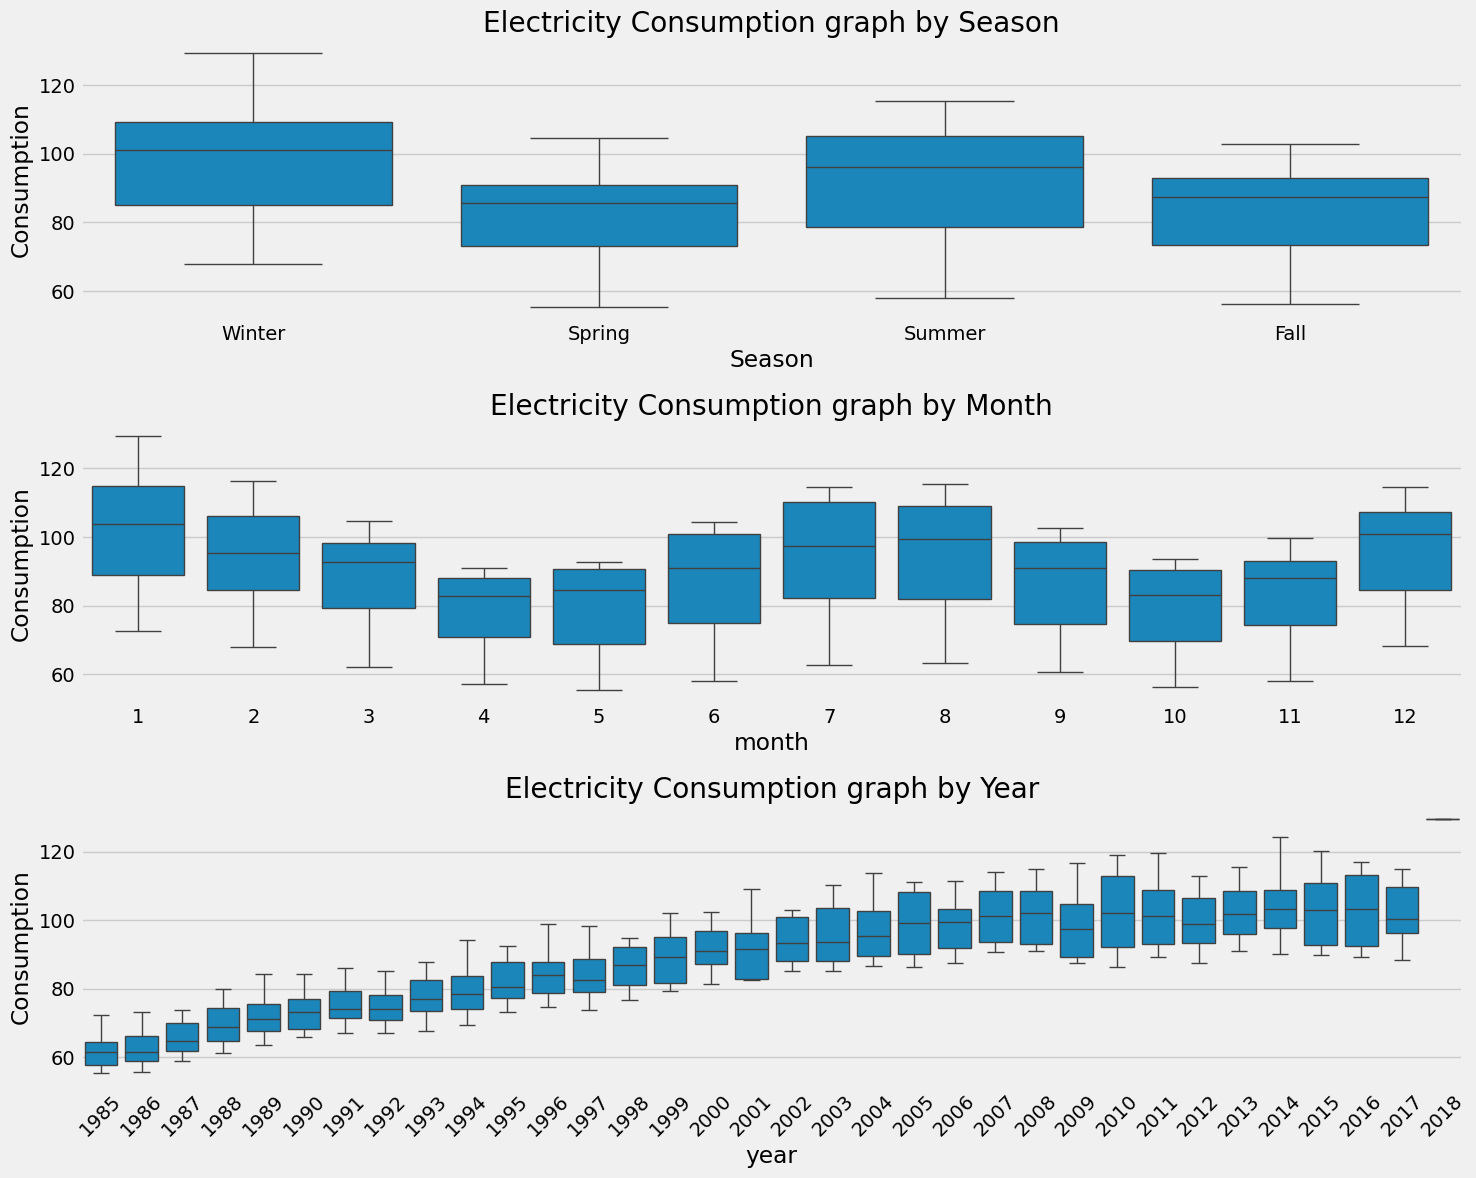

In [22]:
# Set up a 1x2 grid for the subplots

# Set up a 2x1 grid for the subplots
f, ax = plt.subplots(3, 1, figsize=(15, 12))


# Boxplot for electricity consumption by Season
p1 = sns.boxplot(data=df, x='Season', y='Consumption', ax=ax[0])
p1.set_title("Electricity Consumption graph by Season")

# Boxplot for electricity consumption by Month
p2 = sns.boxplot(data=df, x='month', y='Consumption', ax=ax[1])
p2.set_title("Electricity Consumption graph by Month")

# Boxplot for electricity consumption by Year
p3 = sns.boxplot(data=df, x='year', y='Consumption', ax=ax[2])
p3.set_title("Electricity Consumption graph by Year")
# Rotate x-tick labels for the Year plot
plt.xticks(ax[2].get_xticks(), rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

In [23]:
df.head()

,Consumption,lag1,lag2,lag3,lag4,lag5,year,hour,dayofweek,month,quarter,dayofyear,Season
Date,,,,,,,,,,,,,
1985-01-01,72.5052,NaN,NaN,NaN,NaN,NaN,1985,0,1,1,1,1,Winter
1985-02-01,70.6720,72.5052,NaN,NaN,NaN,NaN,1985,0,4,2,1,32,Winter
1985-03-01,62.4502,70.6720,72.5052,NaN,NaN,NaN,1985,0,4,3,1,60,Spring
1985-04-01,57.4714,62.4502,70.6720,72.5052,NaN,NaN,1985,0,0,4,2,91,Spring
1985-05-01,55.3151,57.4714,62.4502,70.6720,72.5052,NaN,1985,0,2,5,2,121,Spring


In [24]:
df.tail()

,Consumption,lag1,lag2,lag3,lag4,lag5,year,hour,dayofweek,month,quarter,dayofyear,Season
Date,,,,,,,,,,,,,
2017-09-01,98.6154,108.9312,112.1538,102.1532,92.0805,88.3530,2017,0,4,9,3,244,Fall
2017-10-01,93.6137,98.6154,108.9312,112.1538,102.1532,92.0805,2017,0,6,10,4,274,Fall
2017-11-01,97.3359,93.6137,98.6154,108.9312,112.1538,102.1532,2017,0,2,11,4,305,Fall
2017-12-01,114.7212,97.3359,93.6137,98.6154,108.9312,112.1538,2017,0,4,12,4,335,Winter
2018-01-01,129.4048,114.7212,97.3359,93.6137,98.6154,108.9312,2018,0,0,1,1,1,Winter


In [25]:
df = df.drop(df.index[-1])

In [26]:
df.tail()

,Consumption,lag1,lag2,lag3,lag4,lag5,year,hour,dayofweek,month,quarter,dayofyear,Season
Date,,,,,,,,,,,,,
2017-08-01,108.9312,112.1538,102.1532,92.0805,88.3530,101.0396,2017,0,1,8,3,213,Summer
2017-09-01,98.6154,108.9312,112.1538,102.1532,92.0805,88.3530,2017,0,4,9,3,244,Fall
2017-10-01,93.6137,98.6154,108.9312,112.1538,102.1532,92.0805,2017,0,6,10,4,274,Fall
2017-11-01,97.3359,93.6137,98.6154,108.9312,112.1538,102.1532,2017,0,2,11,4,305,Fall
2017-12-01,114.7212,97.3359,93.6137,98.6154,108.9312,112.1538,2017,0,4,12,4,335,Winter


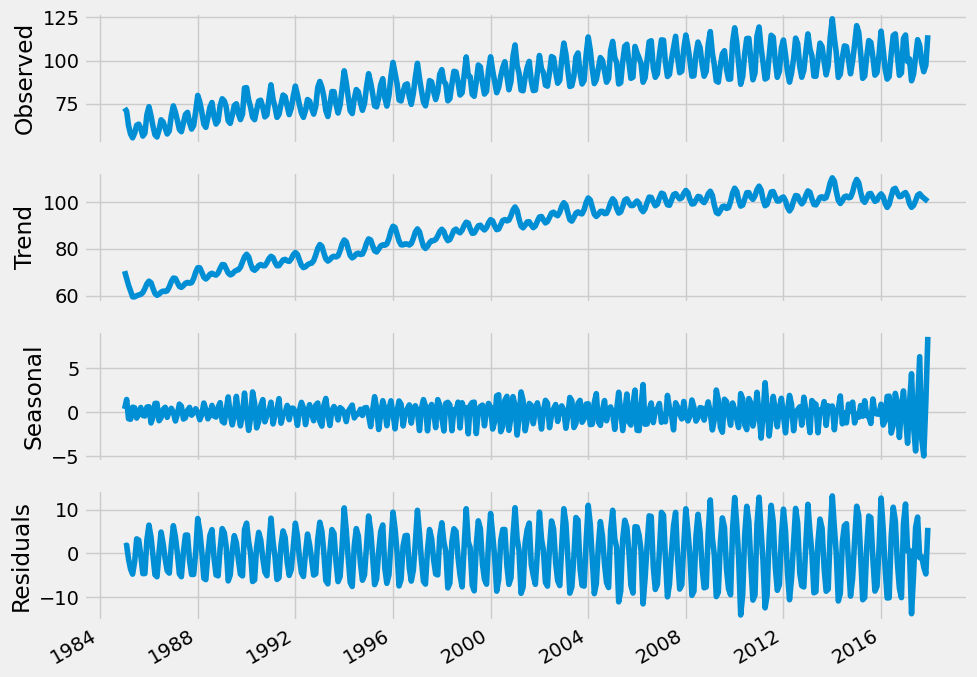

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose, STL
advanced_decomposition = STL(df.Consumption, period=4).fit()
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, sharex=True)

ax1.plot(advanced_decomposition.observed)
ax1.set_ylabel('Observed')

ax2.plot(advanced_decomposition.trend)
ax2.set_ylabel('Trend')

ax3.plot(advanced_decomposition.seasonal)
ax3.set_ylabel('Seasonal')

ax4.plot(advanced_decomposition.resid)
ax4.set_ylabel('Residuals')


# plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()

In [28]:
# Split Data
train, test = df[:-12], df[-12:].copy()
print('Observations: %d' % (len(df)))
print('Training Observations: %d' % (len(train)))
print('Testing Observations: %d' % (len(test)))

Observations: 396
Training Observations: 384
Testing Observations: 12


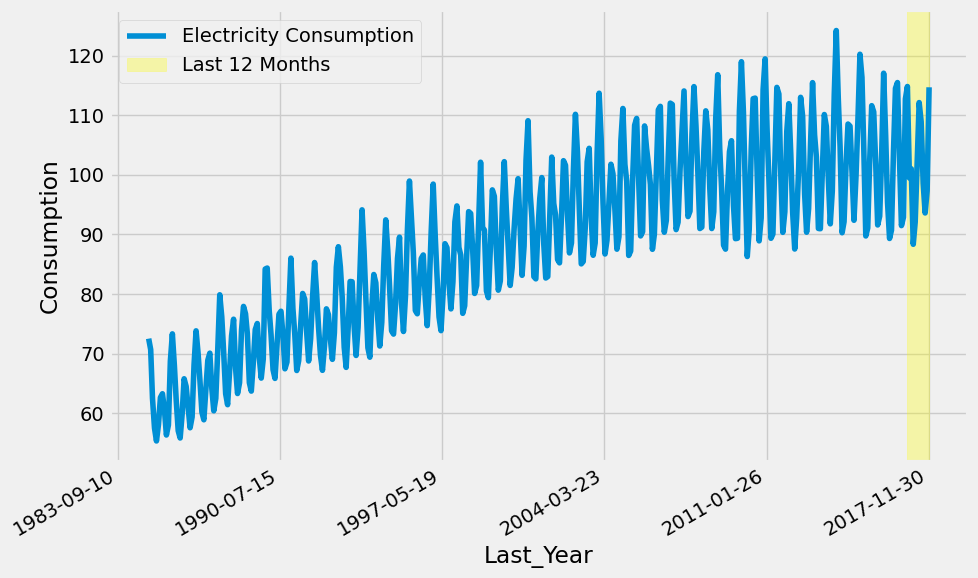

In [29]:
# Plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the time series
ax.plot(df.index, df['Consumption'], label="Electricity Consumption")
ax.set_xlabel('Last_Year')
ax.set_ylabel('Consumption')

# Highlight the last four quarters
start_highlight = df.index[-12]  
end_highlight = df.index[-1]  
ax.axvspan(start_highlight, end_highlight, color='yellow', alpha=0.3, label="Last 12 Months")

# Format x-ticks dynamically based on the range of data
ax.xaxis.set_major_locator(plt.MaxNLocator(6))  # Limit to 6 ticks for clarity
fig.autofmt_xdate()  # Auto-format dates for readability

# Tight layout for better spacing
plt.tight_layout()


# Show the plot
plt.legend()
plt.show()

In [30]:
# Predict historical mean
historical_mean = np.mean(train['Consumption'])
historical_mean

88.33229817708333

In [31]:
test.loc[:, 'pred_mean'] = historical_mean
test

,Consumption,lag1,lag2,lag3,lag4,lag5,year,hour,dayofweek,month,quarter,dayofyear,Season,pred_mean
Date,,,,,,,,,,,,,,
2017-01-01,114.8505,112.7694,92.8900,91.4867,102.7637,115.5159,2017,0,6,1,1,1,Winter,88.332298
2017-02-01,99.4901,114.8505,112.7694,92.8900,91.4867,102.7637,2017,0,2,2,1,32,Winter,88.332298
2017-03-01,101.0396,99.4901,114.8505,112.7694,92.8900,91.4867,2017,0,2,3,1,60,Spring,88.332298
2017-04-01,88.3530,101.0396,99.4901,114.8505,112.7694,92.8900,2017,0,5,4,2,91,Spring,88.332298
2017-05-01,92.0805,88.3530,101.0396,99.4901,114.8505,112.7694,2017,0,0,5,2,121,Spring,88.332298
2017-06-01,102.1532,92.0805,88.3530,101.0396,99.4901,114.8505,2017,0,3,6,2,152,Summer,88.332298
2017-07-01,112.1538,102.1532,92.0805,88.3530,101.0396,99.4901,2017,0,5,7,3,182,Summer,88.332298
2017-08-01,108.9312,112.1538,102.1532,92.0805,88.3530,101.0396,2017,0,1,8,3,213,Summer,88.332298
2017-09-01,98.6154,108.9312,112.1538,102.1532,92.0805,88.3530,2017,0,4,9,3,244,Fall,88.332298


In [32]:
#function to find MAPE
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mape_hist_mean = mape(test['Consumption'], test['pred_mean'])
mape_hist_mean

12.7480282478441

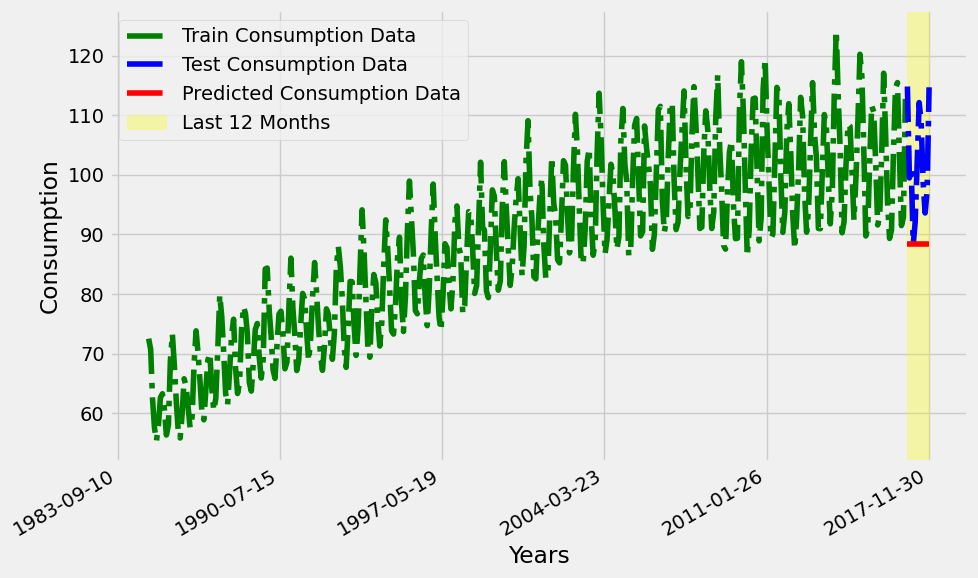

In [33]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the time series
ax.plot(train.index, train['Consumption'],'g-.', label="Train Consumption Data")
ax.plot(test.index, test['Consumption'],'b-.', label="Test Consumption Data")
ax.plot(test.index, test['pred_mean'],'r-.', label="Predicted Consumption Data")

ax.set_xlabel('Years')
ax.set_ylabel('Consumption')

# Highlight the last four quarters
start_highlight = df.index[-12]  
end_highlight = df.index[-1]  
ax.axvspan(start_highlight, end_highlight, color='yellow', alpha=0.3, label="Last 12 Months")

# Format x-ticks dynamically based on the range of data
ax.xaxis.set_major_locator(plt.MaxNLocator(6))  # Limit to 6 ticks for clarity
fig.autofmt_xdate()  # Auto-format dates for readability

# Tight layout for better spacing
plt.tight_layout()


# Show the plot
plt.legend()
plt.show()

In [34]:
last_year_mean = np.mean(train['Consumption'][-12:])
last_year_mean

102.76437499999999

In [35]:
test.loc[:, 'pred__last_yr_mean'] = last_year_mean
test.head()

,Consumption,lag1,lag2,lag3,lag4,lag5,year,hour,dayofweek,month,quarter,dayofyear,Season,pred_mean,pred__last_yr_mean
Date,,,,,,,,,,,,,,,
2017-01-01,114.8505,112.7694,92.8900,91.4867,102.7637,115.5159,2017,0,6,1,1,1,Winter,88.332298,102.764375
2017-02-01,99.4901,114.8505,112.7694,92.8900,91.4867,102.7637,2017,0,2,2,1,32,Winter,88.332298,102.764375
2017-03-01,101.0396,99.4901,114.8505,112.7694,92.8900,91.4867,2017,0,2,3,1,60,Spring,88.332298,102.764375
2017-04-01,88.3530,101.0396,99.4901,114.8505,112.7694,92.8900,2017,0,5,4,2,91,Spring,88.332298,102.764375
2017-05-01,92.0805,88.3530,101.0396,99.4901,114.8505,112.7694,2017,0,0,5,2,121,Spring,88.332298,102.764375


In [36]:
mape_last_year_mean = mape(test['Consumption'], test['pred__last_yr_mean'])
mape_last_year_mean

7.337372422024002

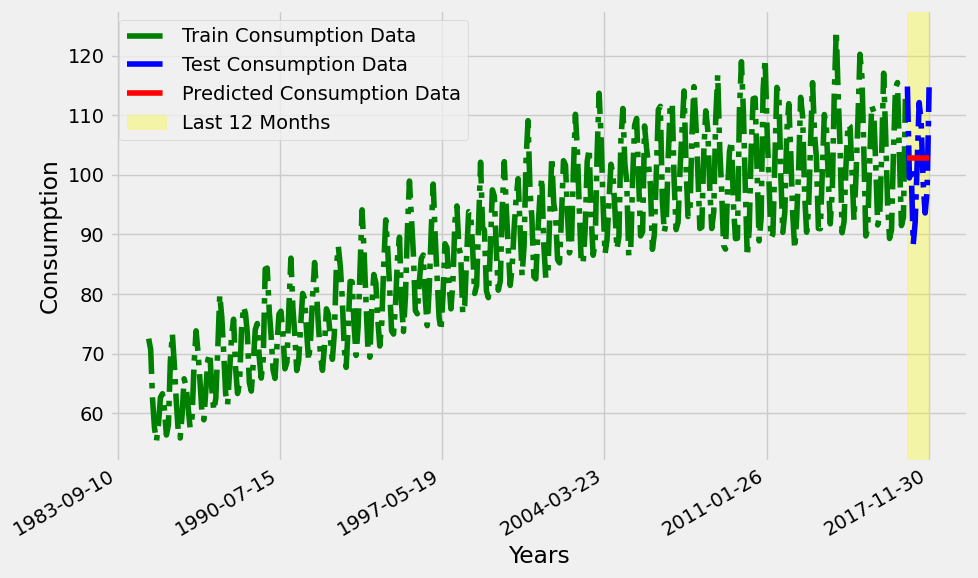

In [37]:
fig, ax = plt.subplots(figsize=(10, 6))
# Plot the time series
ax.plot(train.index, train['Consumption'],'g-.', label="Train Consumption Data")
ax.plot(test.index, test['Consumption'],'b-.', label="Test Consumption Data")
ax.plot(test.index, test['pred__last_yr_mean'],'r-.', label="Predicted Consumption Data")

ax.set_xlabel('Years')
ax.set_ylabel('Consumption')

# Highlight the last four quarters
start_highlight = df.index[-12]  
end_highlight = df.index[-1]  
ax.axvspan(start_highlight, end_highlight, color='yellow', alpha=0.3, label="Last 12 Months")

# Format x-ticks dynamically based on the range of data
ax.xaxis.set_major_locator(plt.MaxNLocator(6))  # Limit to 6 ticks for clarity
fig.autofmt_xdate()  # Auto-format dates for readability

# Tight layout for better spacing
plt.tight_layout()


# Show the plot
plt.legend()
plt.show()

In [38]:
last = train['Consumption'].iloc[-1]
last

112.7694

In [39]:
test.loc[:, 'pred_last'] = last
test.head()

,Consumption,lag1,lag2,lag3,lag4,lag5,year,hour,dayofweek,month,quarter,dayofyear,Season,pred_mean,pred__last_yr_mean,pred_last
Date,,,,,,,,,,,,,,,,
2017-01-01,114.8505,112.7694,92.8900,91.4867,102.7637,115.5159,2017,0,6,1,1,1,Winter,88.332298,102.764375,112.7694
2017-02-01,99.4901,114.8505,112.7694,92.8900,91.4867,102.7637,2017,0,2,2,1,32,Winter,88.332298,102.764375,112.7694
2017-03-01,101.0396,99.4901,114.8505,112.7694,92.8900,91.4867,2017,0,2,3,1,60,Spring,88.332298,102.764375,112.7694
2017-04-01,88.3530,101.0396,99.4901,114.8505,112.7694,92.8900,2017,0,5,4,2,91,Spring,88.332298,102.764375,112.7694
2017-05-01,92.0805,88.3530,101.0396,99.4901,114.8505,112.7694,2017,0,0,5,2,121,Spring,88.332298,102.764375,112.7694


In [40]:
mape_last = mape(test['Consumption'], test['pred_last'])
mape_last

11.975759921151734

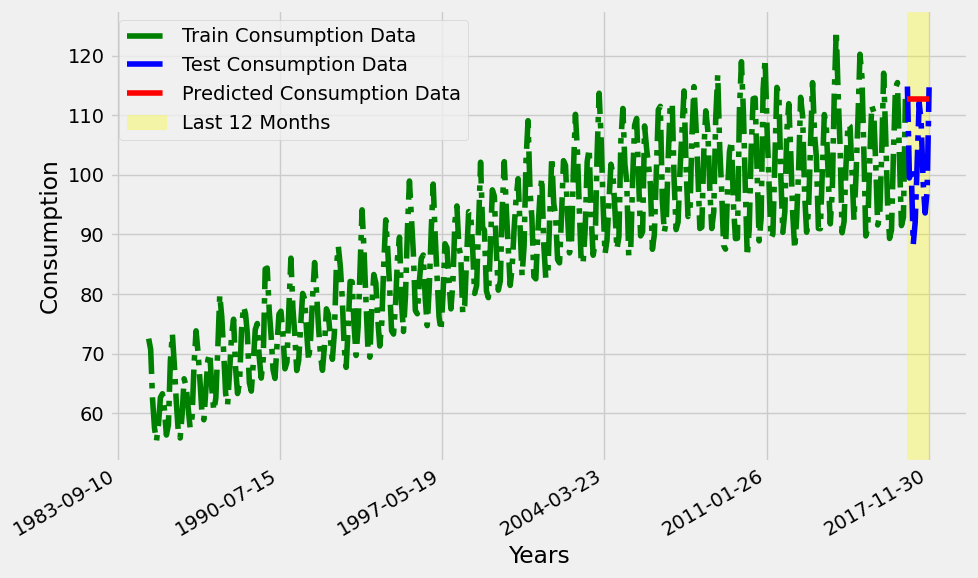

In [41]:
fig, ax = plt.subplots(figsize=(10, 6))
# Plot the time series
ax.plot(train.index, train['Consumption'],'g-.', label="Train Consumption Data")
ax.plot(test.index, test['Consumption'],'b-.', label="Test Consumption Data")
ax.plot(test.index, test['pred_last'],'r-.', label="Predicted Consumption Data")

ax.set_xlabel('Years')
ax.set_ylabel('Consumption')

# Highlight the last four quarters
start_highlight = df.index[-12]  
end_highlight = df.index[-1]  
ax.axvspan(start_highlight, end_highlight, color='yellow', alpha=0.3, label="Last 12 Months")

# Format x-ticks dynamically based on the range of data
ax.xaxis.set_major_locator(plt.MaxNLocator(6))  # Limit to 6 ticks for clarity
fig.autofmt_xdate()  # Auto-format dates for readability

# Tight layout for better spacing
plt.tight_layout()


# Show the plot
plt.legend()
plt.show()

In [42]:
test.loc[:, 'pred_last_season'] = train['Consumption'][-12:].values
test.head()

,Consumption,lag1,lag2,lag3,lag4,lag5,year,hour,dayofweek,month,quarter,dayofyear,Season,pred_mean,pred__last_yr_mean,pred_last,pred_last_season
Date,,,,,,,,,,,,,,,,,
2017-01-01,114.8505,112.7694,92.8900,91.4867,102.7637,115.5159,2017,0,6,1,1,1,Winter,88.332298,102.764375,112.7694,117.0837
2017-02-01,99.4901,114.8505,112.7694,92.8900,91.4867,102.7637,2017,0,2,2,1,32,Winter,88.332298,102.764375,112.7694,106.6688
2017-03-01,101.0396,99.4901,114.8505,112.7694,92.8900,91.4867,2017,0,2,3,1,60,Spring,88.332298,102.764375,112.7694,95.3548
2017-04-01,88.3530,101.0396,99.4901,114.8505,112.7694,92.8900,2017,0,5,4,2,91,Spring,88.332298,102.764375,112.7694,89.3254
2017-05-01,92.0805,88.3530,101.0396,99.4901,114.8505,112.7694,2017,0,0,5,2,121,Spring,88.332298,102.764375,112.7694,90.7369


In [43]:
mape_naive_seasonal = mape(test['Consumption'], test['pred_last_season'])
mape_naive_seasonal

3.342526042689362

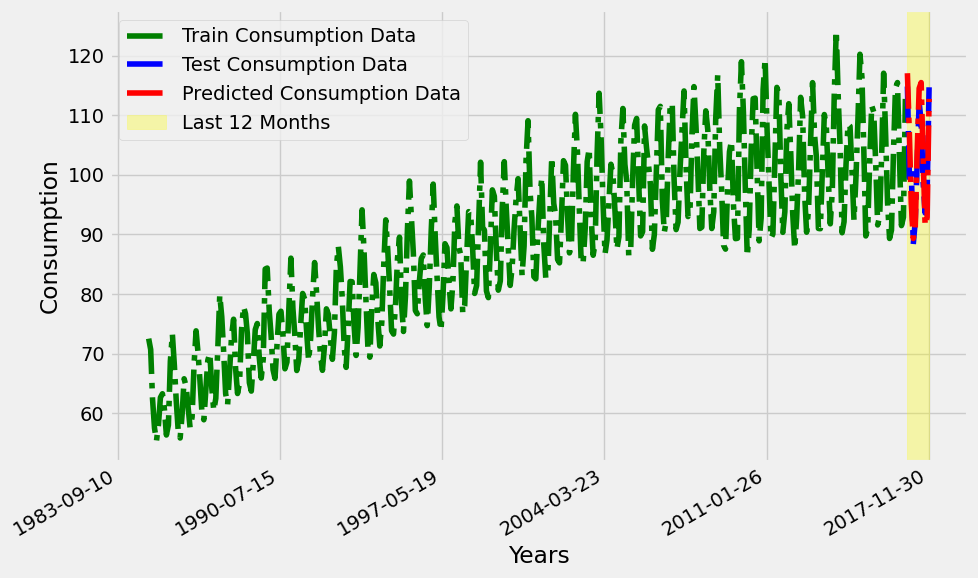

In [44]:
fig, ax = plt.subplots(figsize=(10, 6))
# Plot the time series
ax.plot(train.index, train['Consumption'],'g-.', label="Train Consumption Data")
ax.plot(test.index, test['Consumption'],'b-.', label="Test Consumption Data")
ax.plot(test.index, test['pred_last_season'],'r-.', label="Predicted Consumption Data")

ax.set_xlabel('Years')
ax.set_ylabel('Consumption')

# Highlight the last four quarters
start_highlight = df.index[-12]  
end_highlight = df.index[-1]  
ax.axvspan(start_highlight, end_highlight, color='yellow', alpha=0.3, label="Last 12 Months")

# Format x-ticks dynamically based on the range of data
ax.xaxis.set_major_locator(plt.MaxNLocator(6))  # Limit to 6 ticks for clarity
fig.autofmt_xdate()  # Auto-format dates for readability

# Tight layout for better spacing
plt.tight_layout()


# Show the plot
plt.legend()
plt.show()

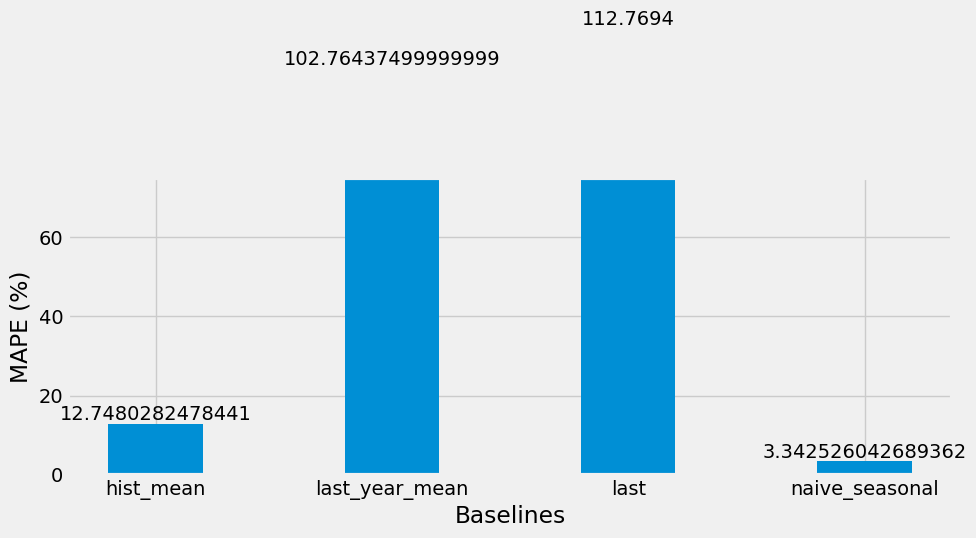

In [45]:
# BASELINE
fig, ax = plt.subplots()

x = ['hist_mean', 'last_year_mean', 'last', 'naive_seasonal']
y = [mape_hist_mean , last_year_mean, last, mape_naive_seasonal]

ax.bar(x, y, width=0.4)
ax.set_xlabel('Baselines')
ax.set_ylabel('MAPE (%)')
ax.set_ylim(0, 75)

for index, value in enumerate(y):
    plt.text(x=index, y=value + 1, s=str(value), ha='center')

plt.tight_layout()